<a href="https://www.kaggle.com/code/kendrickdhnguyen/used-car-pricing-baseline-eda-model?scriptVersionId=240481531" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---

# Used Car Pricing Project in Vietnam
**Predictive Analysis and Exploratory Data Analysis (EDA)**  
**Author**: Kendrick Nguyen  
**Date**: April 2025  

---

## Project Overview

This project aims to analyze and build a predictive model to estimate the selling price of used cars in Vietnam. Accurate pricing helps buyers avoid overpaying and supports sellers in setting competitive prices.  

### Objectives:

- Conduct Exploratory Data Analysis (EDA) to identify important features.
- Preprocess and clean the data.
- Develop and evaluate predictive models.
- Generate actionable insights from the analysis.

### Dataset Information:

The dataset contains the following files:

- `train.csv`: Training data including features and target (`selling_price`).
- `test.csv`: Test data for evaluating the predictive model.
- `sample.csv`: Submission template for the Kaggle competition.

---

## Setup and Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

if os.path.exists('/kaggle/input'):
    path = '/kaggle/input/used-car-pricing-vietnam-dataset'
else:
    path = '../data'

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

---

## Data Loading

**Loading datasets**:

In [2]:
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv',sep=';')
sample = pd.read_csv(f'{path}/sample.csv')

train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


---

## Exploratory Data Analysis (EDA)

### Basic Information:

In [3]:
train.info()
train.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5589 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6000,6000.000000,6.000000e+03,6.000000e+03,6000,6000,6000,6000,5841,5841,5846,5840,5589.000000
unique,1801,NaN,NaN,NaN,4,3,2,5,371,118,303,409,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,90,NaN,NaN,NaN,3265,5006,5228,3904,155,735,272,384,NaN
mean,NaN,2013.814833,6.387764e+05,6.997216e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.435856
std,NaN,4.026733,8.066632e+05,5.188961e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.975015
min,NaN,1983.000000,3.000000e+04,1.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.557498e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.900000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


### Target Variable Distribution
Visualizing the distribution of the target variable (`selling_price`):

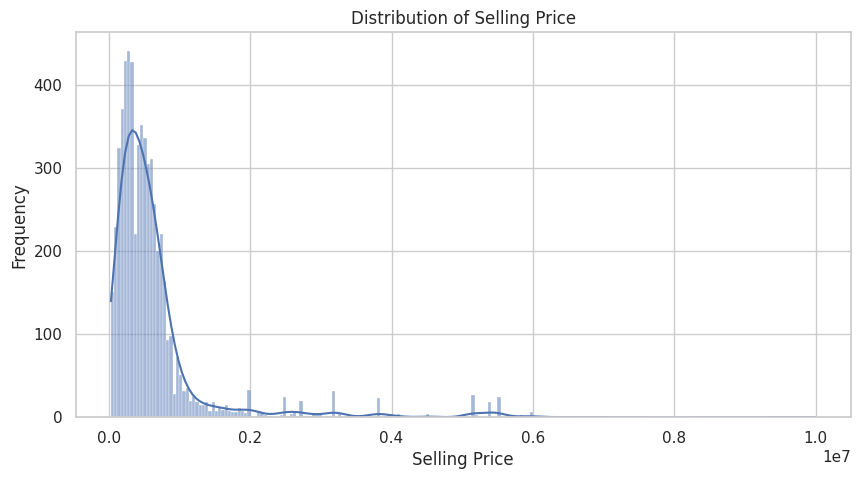

In [4]:
sns.histplot(train['selling_price'], kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

---

## Data Cleaning and Preprocessing

### Handling Missing Values
Checking and summarizing missing values:

In [5]:
train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            411
dtype: int64

Cleaning numeric columns (`mileage`, `engine`, `max_power`, `torque`):


In [6]:
def clean_numeric_column(col, unit):
    return train[col].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

train['mileage'] = clean_numeric_column('mileage', 'kmpl')
train['engine'] = clean_numeric_column('engine', 'CC')
train['max_power'] = clean_numeric_column('max_power', 'bhp')
train['torque'] = train['torque'].str.extract(r'(\d+\.?\d*)').astype(float)

Imputing missing numeric values:

In [7]:
from sklearn.impute import SimpleImputer

numeric_cols = ['mileage', 'engine', 'max_power', 'torque', 'seats']
imputer = SimpleImputer(strategy='mean')
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])

---

### Feature Engineering

Creating additional meaningful features:

- **Extracting brand** from the `name`:

In [8]:
train['brand'] = train['name'].apply(lambda x: x.split()[0])

- **Car age** feature:

In [9]:
train['car_age'] = 2025 - train['year']

- **Encoding categorical features**:

In [10]:
train['is_automatic'] = train['transmission'].map({'Manual':0, 'Automatic':1})
train['owner_encoded'] = train['owner'].map({
    'First Owner':1, 
    'Second Owner':2, 
    'Third Owner':3, 
    'Fourth & Above Owner':4,
    'Test Drive Car':0
})

---

## Data Visualization

### Correlation Matrix
Visualizing correlations between numeric features:


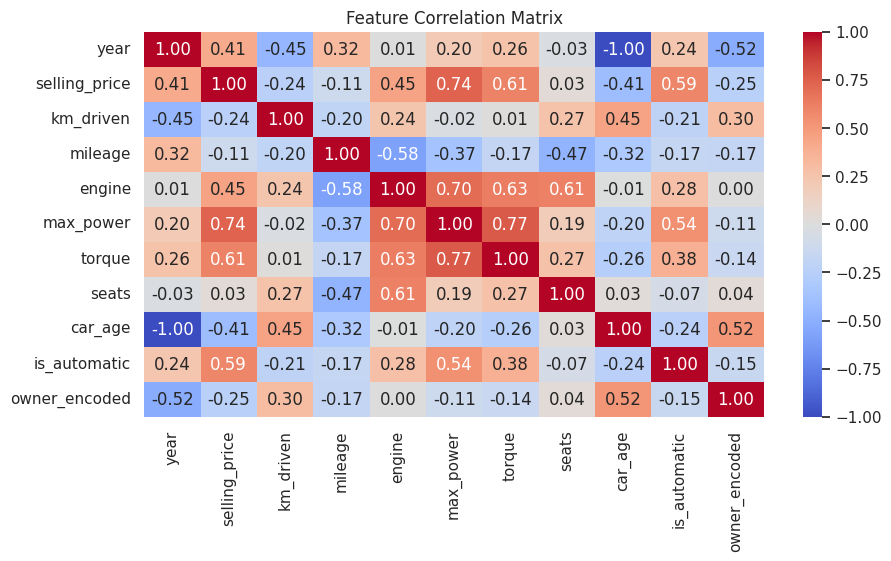

In [11]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### Feature Distribution
Exploring distributions for numeric and categorical features:

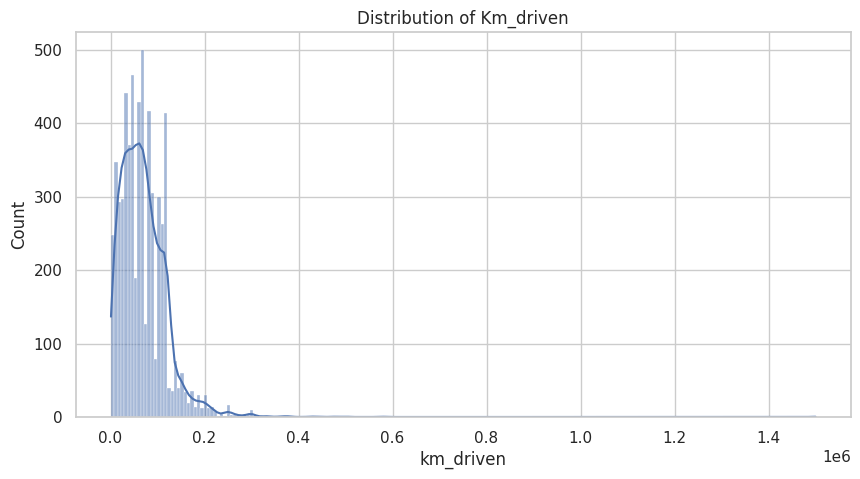

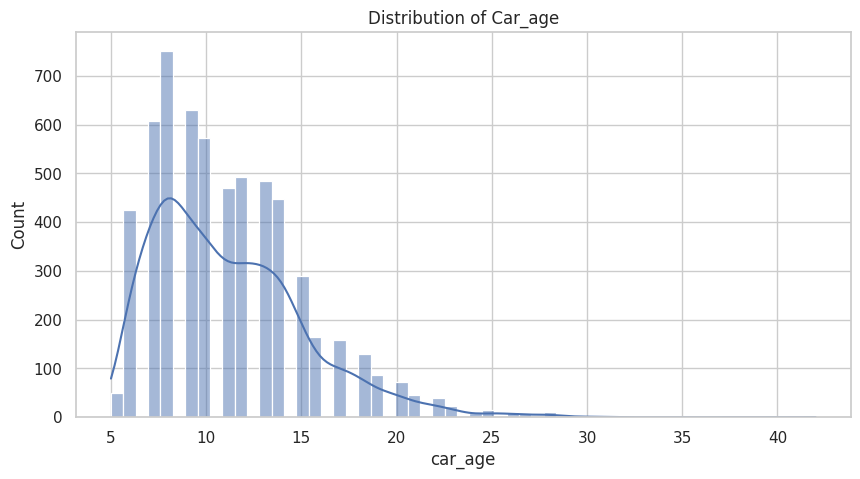

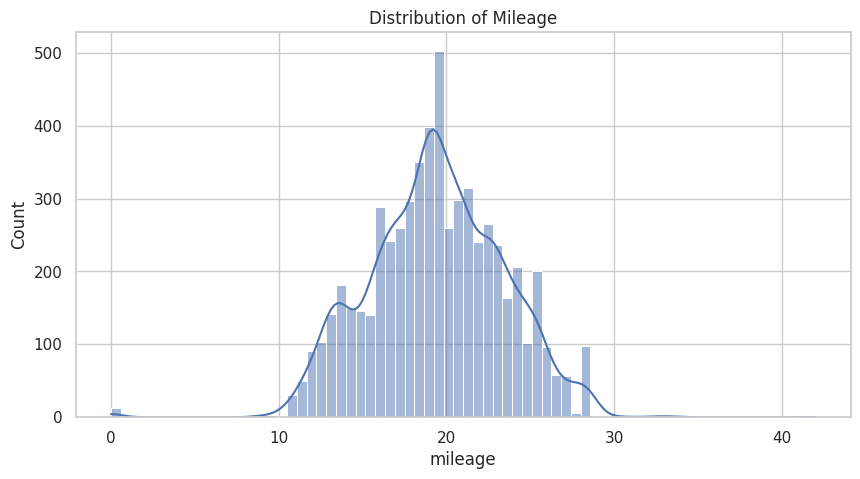

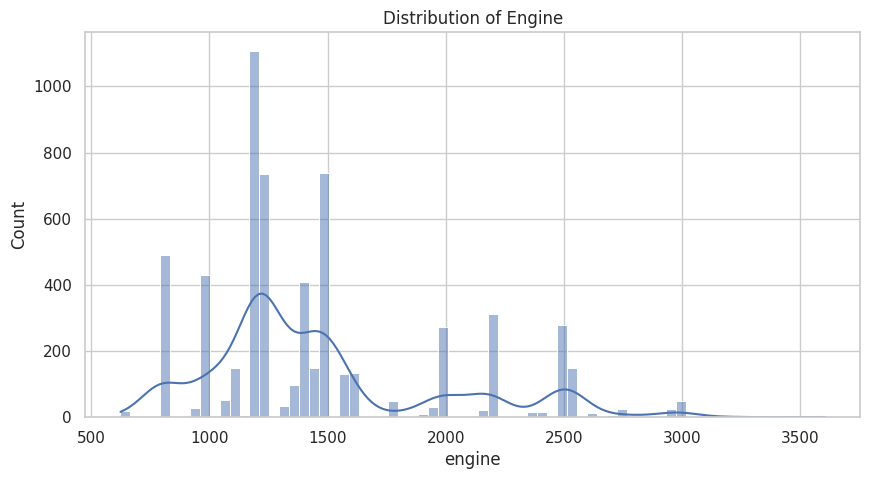

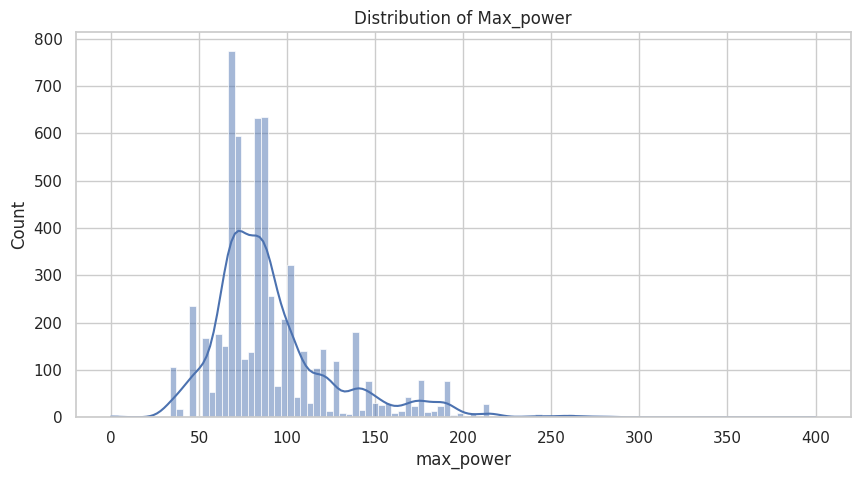

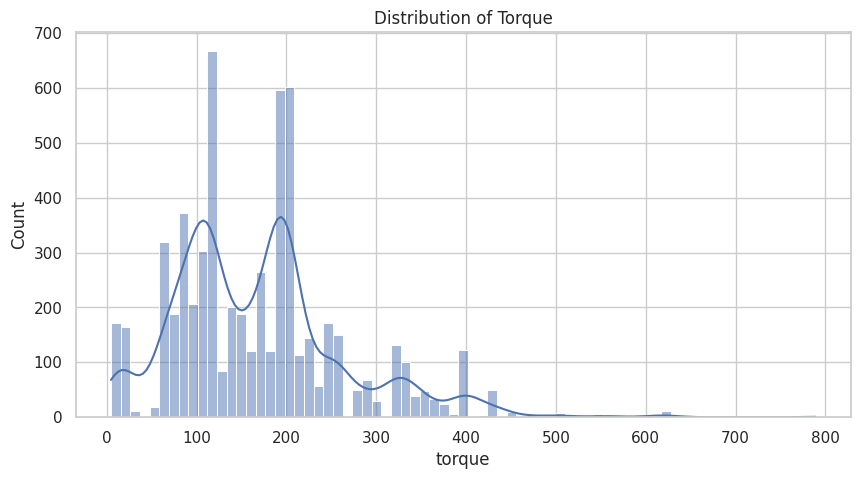

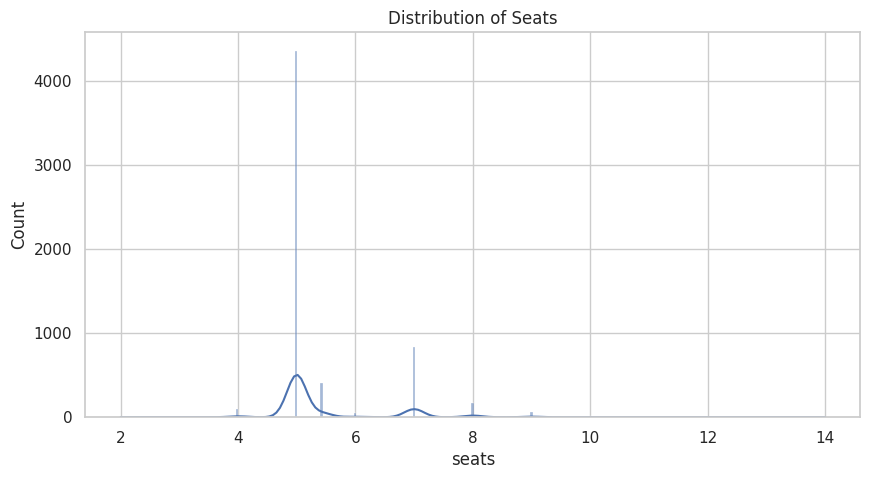

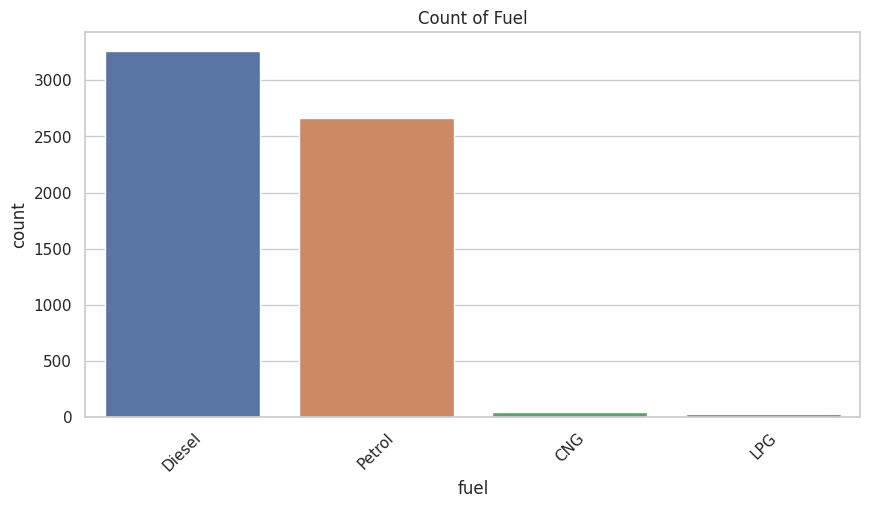

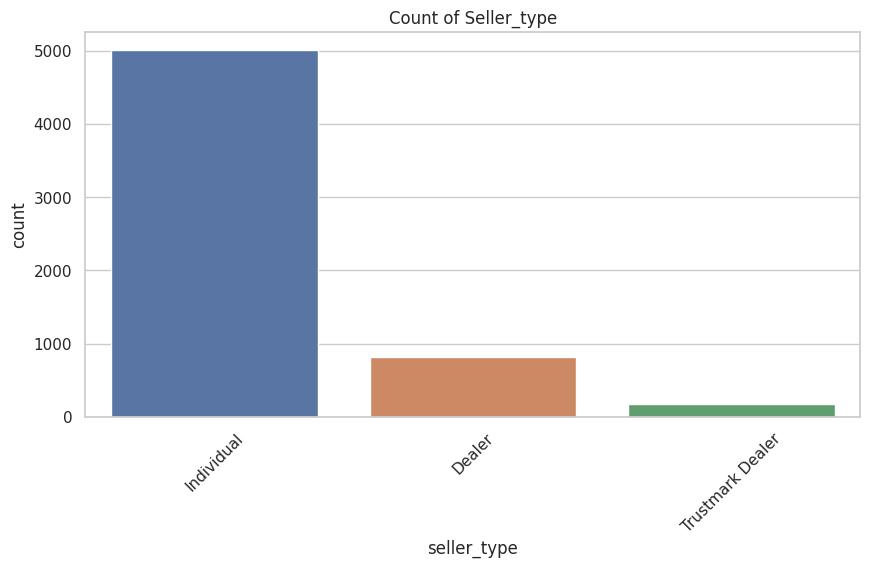

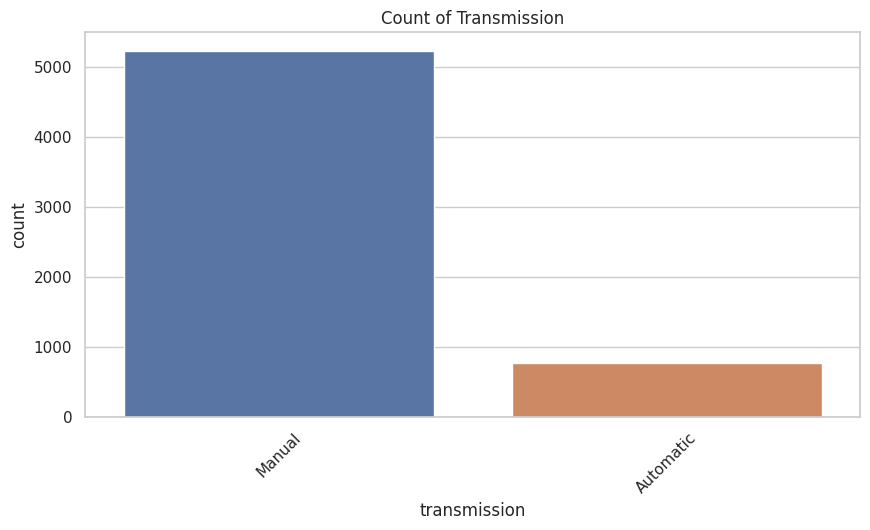

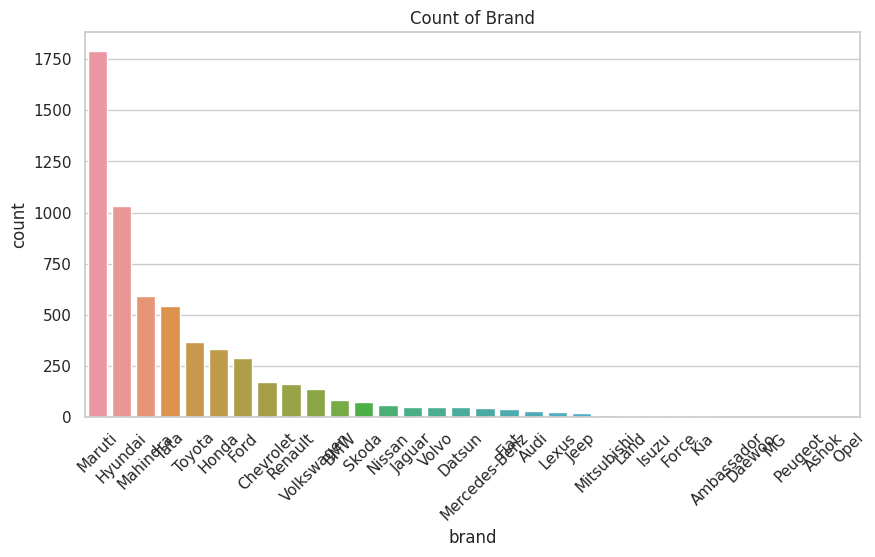

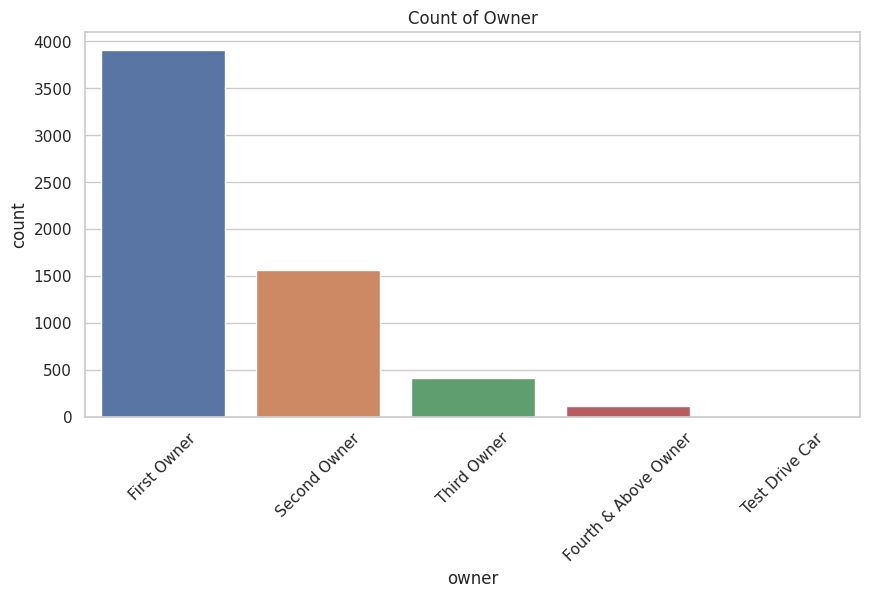

In [12]:
numeric_cols = ['km_driven', 'car_age', 'mileage', 'engine', 'max_power', 'torque', 'seats']

for col in numeric_cols:
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.show()

categorical_cols = ['fuel', 'seller_type', 'transmission', 'brand', 'owner']

for col in categorical_cols:
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.title(f'Count of {col.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

---

## Predictive Modeling

### Defining Target and Features

In [13]:
target = 'selling_price'

features = [
    'car_age', 'km_driven', 'mileage', 'engine', 'max_power',
    'torque', 'seats', 'is_automatic', 'owner_encoded',
    'fuel', 'seller_type', 'brand'
]

X = pd.get_dummies(train[features], drop_first=True)
y = train[target]

### Train-Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Linear Regression Model
Training and evaluating a linear regression model:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 172060.51452127157
MSE: 105478156675.32117
RMSE: 324774.0086203346
R2 Score: 0.8362678057059263


---

## Model Evaluation and Insights

Evaluate model performance clearly (you may add more models later):

| Metric       | Value             |
|--------------|-------------------|
| MAE          | 172,060.51        |
| MSE          | 105,478,156,675.32|
| RMSE         | 324,774.01        |
| R² Score     | 0.8363 (83.63%)   |

### Observations:

- **Mean Absolute Error (MAE):** `172,060.51`
  - On average, model predictions differ from actual selling prices by approximately 172,060 VND.
  - Lower is better. This number is acceptable based on average prices in dataset.

- **Mean Squared Error (MSE):** `105,478,156,675.32`
  - This represents the squared errors averaged across all predictions. This is sensitive to larger errors.
  - A large MSE suggests predictions can occasionally be far off from actual prices.

- **Root Mean Squared Error (RMSE):** `324,774.01`
  - On average, predictions deviate by roughly 324,774 VND.
  - Easier to interpret practically than MSE.

- **R² Score:** `0.8363 (83.63%)`
  - Indicates model explains about **83.6%** of the variation in selling prices.
  - Generally, an R² above 0.8 is considered good for predicting car prices, but higher is better.

---  

## Final Submission Preparation  

In this section, we preprocess the test dataset, make predictions using our trained model, and export the results to `submission.csv` for Kaggle submission.  


In [16]:
# Load test.csv
test = pd.read_csv(f'{path}/test.csv',sep=';')

# Define preprocessing function for test set
def preprocess_test(df, X_train_columns):
    df = df.copy()

    for col, unit in [('mileage', ' kmpl'), ('engine', ' CC'), ('max_power', ' bhp')]:
        df[col] = df[col].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

    owner_mapping = {
        'First Owner': 1,
        'Second Owner': 2,
        'Third Owner': 3,
        'Fourth & Above Owner': 4,
        'Test Drive Car': 0
    }
    df['owner_encoded'] = df['owner'].map(owner_mapping).fillna(0).astype(int)

    df['brand'] = df['name'].str.split().str[0]
    df['car_age'] = 2025 - df['year']
    df['is_automatic'] = (df['transmission'] == 'Automatic').astype(int)

    cat_cols = ['fuel', 'seller_type', 'brand']
    df_encoded = pd.get_dummies(df[['car_age', 'km_driven', 'mileage', 'engine', 'max_power',
                                    'seats', 'torque', 'is_automatic', 'owner_encoded'] + cat_cols],
                                drop_first=True)

    df_encoded = df_encoded.reindex(columns=X.columns, fill_value=0)
    return df_encoded

# Preprocess test data
X_test = preprocess_test(test, X.columns)
X_test = X_test.fillna(0)  # Fix ValueError: Input X contains NaN

# Predict using the trained model
preds = model.predict(X_test)


# Create submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'Predicted': preds  
})

# Export to CSV
submission.to_csv('submission.csv', index=False)
print("File submission.csv has been created successfully!")

File submission.csv has been created successfully!


---

## Conclusion and Recommendations

- Summarize your key findings clearly and concisely.
- Suggest actionable recommendations for buyers, sellers, or future analyses.
- Outline next steps (e.g., testing different algorithms, tuning hyperparameters, expanding dataset).

---

## References

- Dataset source: >_ `kaggle competitions download -c actuarial-program-mfe-predictive-analytics`
- Kaggle Competition: [Actuarial program - MFE - predictive analytics](https://www.kaggle.com/competitions/actuarial-program-mfe-predictive-analytics)

---